i = e12, j = e23, k = e13

i = np.quaternion(0, 1, 0, 0)

j = np.quaternion(0, 0, 1, 0)

k = np.quaternion(0, 0, 0, 1)

# Таблица умножения кватернионов с помощью геометрического умножения

In [2]:
import clifford as cf

In [3]:
layout, blades = cf.Cl(3)
locals().update(blades)

In [4]:
1*1, 1*e12, 1*e23, 1*e13

(1, (1^e12), (1^e23), (1^e13))

In [5]:
e12*1, e12*e12, e12*e23, e12*e13

((1^e12), -1, (1^e13), -(1^e23))

In [6]:
e23*1, e23*e12, e23*e23, e23*e13

((1^e23), -(1^e13), -1, (1^e12))

In [7]:
e13*1, e13*e12, e13*e23, e13*e13

((1^e13), (1^e23), -(1^e12), -1)

# Поворот вектора в трехмерном пространстве

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
# Подмодуль для примитивов
import matplotlib.patches as mpatches

import numpy as np
import quaternion
import math

In [103]:
plt.style.use('default_colors.mplstyle')

In [104]:
# Вектор, который вращаем
P = np.array([(1, 1, 1), (2, 2, 2)])
P1, P2 = P

p1 = np.quaternion(*P1)
p2 = np.quaternion(*P2)

In [105]:
# Ось вращения
U = np.array([0, 0, 10])
u = np.normalized(np.quaternion(*U))

# Угол вращения
α = math.pi/3

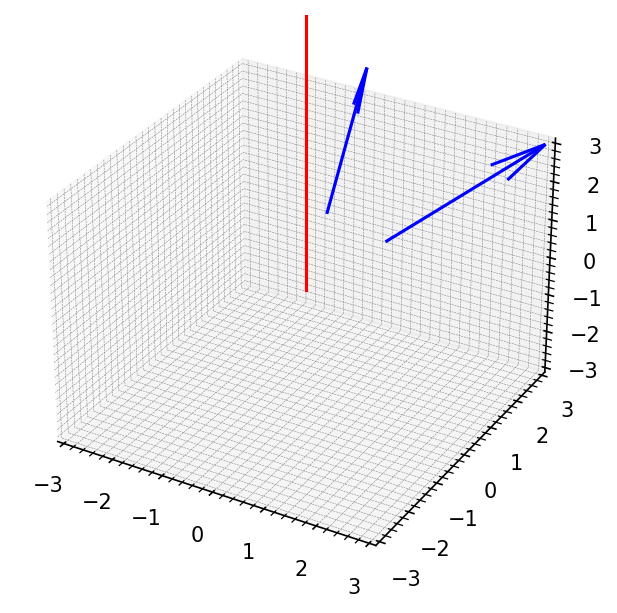

In [106]:
fig01 = plt.figure(num=1, figsize=(5, 5))
ax01 = fig01.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax01.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax01.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax01.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax01.set_zticks([-3, -2, -1, 0, 1, 2, 3])

# Рисуем вектор
ax01.quiver3D(*P1, *P2, color='blue')

# Рисуем ось вращения
ax01.plot((0, U[0]), (0, U[1]), (0, U[2]), color='red')

# Преобразование (поворот)
q = math.cos(α/2) + math.sin(α/2)*u

p1_new = q*p1*q.conjugate()
p2_new = q*p2*q.conjugate()

P1_new = np.array([p1_new.x, p1_new.y, p1_new.z])
P2_new = np.array([p2_new.x, p2_new.y, p2_new.z])

ax01.quiver3D(*P1_new, *P2_new, color='blue')

# Качение колобка

In [23]:
%matplotlib inline
import numpy as np
import quaternion
import math

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import subprocess
import os

plt.style.use('default_colors.mplstyle')

In [77]:
def rotate(x, y, z, α, U):
    u = np.normalized(np.quaternion(*U))
    q = math.sin(α/2) + math.cos(α/2)*u
    x_new = np.zeros([100, 100])
    y_new = np.zeros([100, 100])
    z_new = np.zeros([100, 100])
    for i in range(100):
        for j in range(100):
            quat = np.quaternion(0, x[i][j], y[i][j], z[i][j])
            quat_new = q*quat*q.conjugate()
            x_new[i][j] = quat_new.x
            y_new[i][j] = quat_new.y
            z_new[i][j] = quat_new.z
    return x_new, y_new, z_new

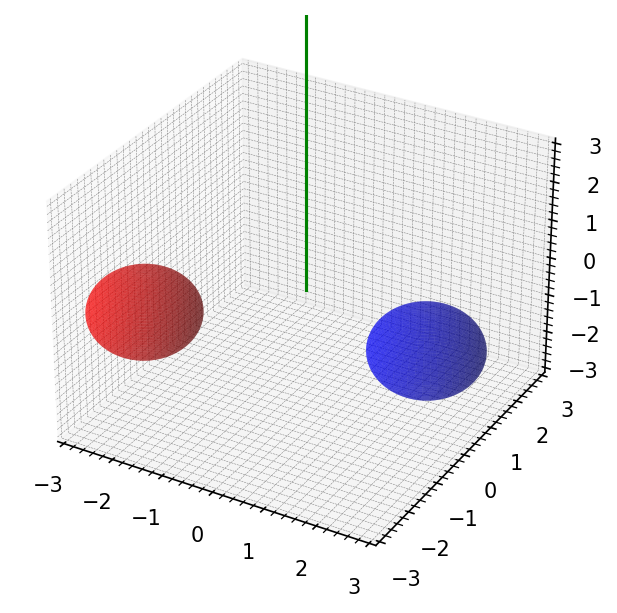

In [78]:
fig02 = plt.figure(num=2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax02.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax02.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax02.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax02.set_zticks([-3, -2, -1, 0, 1, 2, 3])

#u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
#x = np.cos(u)*np.sin(v)
#y = np.sin(u)*np.sin(v)
#z = np.cos(v)
#ax02.plot_wireframe(x, y, z, color="r")

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v)) - 2
y = 1 * np.outer(np.sin(u), np.sin(v)) - 2
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax02.plot_surface(x, y, z, color='r', linewidth=0, alpha=0.5)

U = np.array([[0, 0, 0], [0, 0, 10]])
α = math.pi/3

ax02.plot((U[0][0], U[1][0]), (U[0][1], U[1][1]), (U[0][2], U[1][2]), color='g')

U = U[1] - U[0]

x_new, y_new, z_new = rotate(x, y, z, α, U)
ax02.plot_surface(x_new, y_new, z_new, color='b', linewidth=0, alpha=0.5)

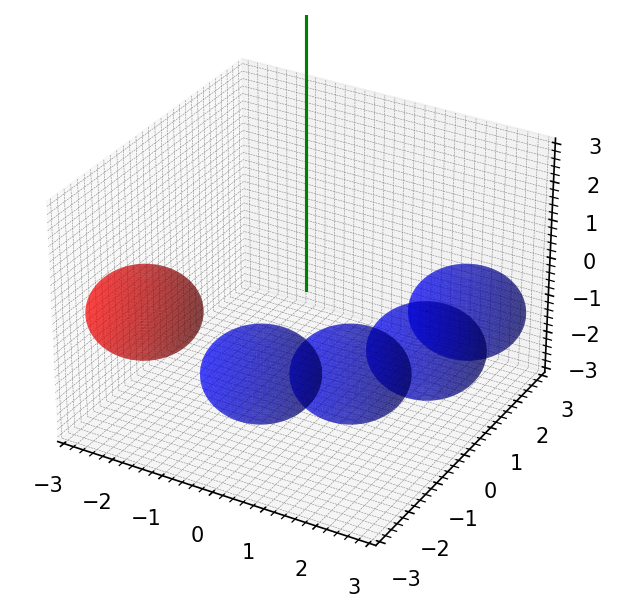

In [92]:
fig02 = plt.figure(num=2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax02.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax02.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax02.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax02.set_zticks([-3, -2, -1, 0, 1, 2, 3])

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v)) - 2
y = 1 * np.outer(np.sin(u), np.sin(v)) - 2
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax02.plot_surface(x, y, z, color='r', linewidth=0, alpha=0.5)

U = np.array([[0, 0, 0], [0, 0, 10]])

ax02.plot((U[0][0], U[1][0]), (U[0][1], U[1][1]), (U[0][2], U[1][2]), color='g')

U = U[1] - U[0]

α = math.pi/6

for i in range(1, 5):
    x_new, y_new, z_new = rotate(x, y, z, i*α, U)
    ax02.plot_surface(x_new, y_new, z_new, color='b', linewidth=0, alpha=0.5)

In [98]:
# укажем директорию, в которую будем 
# сохранять сгенерированные картинки
FOLDER = 'kolobok'
try:
    os.mkdir(FOLDER)
except FileExistsError:
    pass

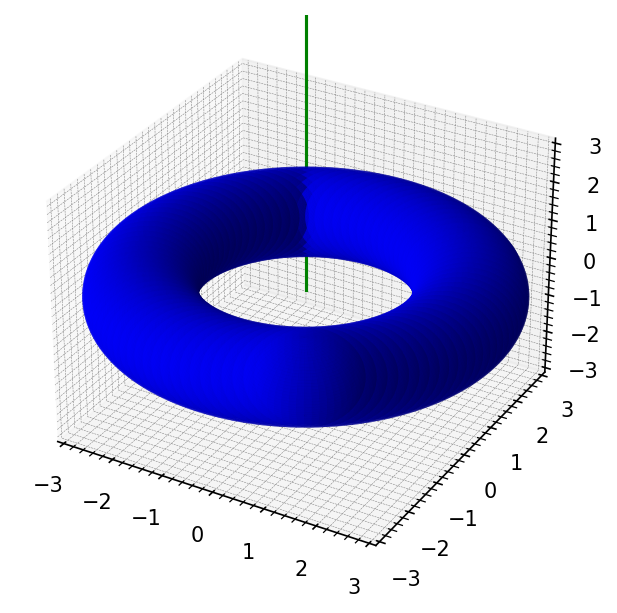

In [99]:
fig03 = plt.figure(num=3, figsize=(5, 5))
ax03 = fig03.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax03.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax03.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax03.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax03.set_zticks([-3, -2, -1, 0, 1, 2, 3])

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 1 * np.outer(np.cos(u), np.sin(v)) - 2
y = 1 * np.outer(np.sin(u), np.sin(v)) - 2
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

#ax03.plot_surface(x, y, z, color='r', linewidth=0, alpha=0.5)

U = np.array([[0, 0, 0], [0, 0, 10]])
ax03.plot((U[0][0], U[1][0]), (U[0][1], U[1][1]), (U[0][2], U[1][2]), color='g')
U = U[1] - U[0]

α = np.linspace(start=0, stop=2*math.pi, num=100)

for i in range(100):
    x_new, y_new, z_new = rotate(x, y, z, α[i], U)
    ax03.plot_surface(x_new, y_new, z_new, color='b', linewidth=0, alpha=0.5)
    
    fig03.savefig(f'{FOLDER}/{i:03d}.png', dpi=300, format='png')
    
    print('=', end='')

In [100]:
FFMPEG = 'D:\\ffmpeg\\bin\\ffmpeg.exe'

CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', f'{FOLDER}/%03d.png',
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', 'kolobok.mp4']
print(' '.join(CMD))

out = subprocess.run(CMD, capture_output=True)
print(out.stderr.decode('utf-8'))

D:\ffmpeg\bin\ffmpeg.exe -y -r 30 -f image2 -i kolobok/%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p kolobok.mp4
ffmpeg version n4.4.1-2-gcc33e73618-20211107 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10-win32 (GCC) 20210610
  configuration: --prefix=/ffbuild/prefix --pkg-config-flags=--static --pkg-config=pkg-config --cross-prefix=x86_64-w64-mingw32- --arch=x86_64 --target-os=mingw32 --enable-gpl --enable-version3 --disable-debug --disable-w32threads --enable-pthreads --enable-iconv --enable-libxml2 --enable-zlib --enable-libfreetype --enable-libfribidi --enable-gmp --enable-lzma --enable-fontconfig --enable-libvorbis --enable-opencl --enable-libvmaf --enable-vulkan --disable-libxcb --disable-xlib --enable-amf --enable-libaom --enable-avisynth --enable-libdav1d --enable-libdavs2 --disable-libfdk-aac --enable-ffnvcodec --enable-cuda-llvm --disable-frei0r --enable-libglslang --enable-libgme --enable-libass --enable-libbluray --enable-libmp3lame --enable-libopus -